In [28]:
from scipy.io import loadmat
import os
import pandas as pd
import numpy as np
from IPython.core.display import display, HTML

path = './timeseries'
files = []
# r=root, d=directories, f = files
for r, d, f in os.walk(path):
    for file in f:
        if 'ROI_Subject' in file:
            files.append(os.path.join(r, file))

for i in range(len(files)):
    whole = loadmat(files[i])
    names = whole['names'][0][3:]
    display(names.shape)
    #display(len(whole['data'][0]))
    #leaving behind white matter and stuff
    data = whole['data'][0][3:]
#     display(type(data))
    for roi in range(len(data)):
        data[roi].shape = len(data[roi])
#         display(type(data[roi]))
#     display(data.shape)
    break

    

(615,)

(615,)

array(['schaefer.66\t17Networks_LH_DorsAttnA_SPL_1\t74\t156\t59\t0'],
      dtype='<U53')

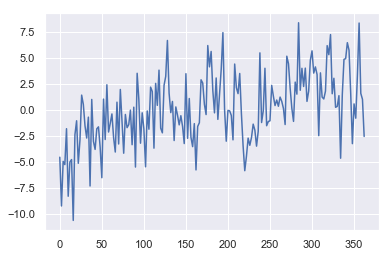

In [47]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

length = len(whole['data'][0][0])

timepoints = np.arange(0, (length * 2), 2.0)
#display(timepoints)

display(whole['names'][0][100])
ax = sns.lineplot(x=timepoints, y=np.transpose(whole['data'][0][100])[0])
plt.show()